Mixing problems in the context of a tank containing a solute, are a classic example used to demonstrate principles in differential equations. These problems typically involve a tank filled with a liquid into which a solute (like a salt or chemical) is introduced, either continuously or at specific intervals. The challenge is to determine the concentration of the solute in the tank over time, considering factors such as the rate of solute addition, the volume of the liquid in the tank, and the mixing or outflow rates. These scenarios are not only academically interesting but also have practical applications in industries like agronomy and environmental engineering.


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt


## Example 1: Tank level and salt concentration

A 1500 gallon tank initially contains 600 gallons of water with 5 lbs of salt dissolved in it. Water enters the tank at a rate of 9 gal/hr and the water entering the tank has a salt concentration of $\frac{1}{5}(1 + cos(t))$ lbs/gal. If a well-mixed solution leaves the tank at a rate of 6 gal/hr:

- how long does it take for the tank to overflow?

- how much salt (total amount in lbs) is in the entire tank when it overflows?

Assume each iteration is equivalent to one hour


We will break the problem into two steps. The first step consists of focusing on the tank volume and leaving the calculation of the salt concentration aside. Trying to solve both questions at the same time can make this problem more difficult than it actual is. A good way of thinking about this problem is by making an analogy with the balance of a checking account (tank level), where we have credits (inflow rate, salary) and debits (outflow, expenses).

### Step 1: Find time it takes to fill the tank

In [1]:
# Initial parameters
tank_capacity = 1500 # gallons
tank_level = 600 # initial tank_level in gallons
inflow_rate = 9 # gal/hr
outflow_rate = 6 # gal/hr


In [3]:
# Step 1: Compute tank volume and determine when the tank is full
counter_hours = 0
while tank_level < tank_capacity:
    tank_level = tank_level + inflow_rate - outflow_rate   
    counter_hours += 1
    
print('Hours:', counter_hours)
print('Tank level:',tank_level)


Hours: 300
Tank level: 1500


### Step 2: Add the calculation of the amount of salt

Now that we understand the problem in simple terms and we were able to implement it in Python, is time to add the computation of salt concentration at each time step. In this step is important to realize that concentration is amount of salt per unit volume of water, in this case gallons of water. Following the same reasoning of the previous step, we now need to calculate the balance of salt taking into account initial salt content, inflow, and outflow. So, to solve the problem we need:

- the inflow rate of water with salt
- the salt concentration of the inflow rate
- the outflow rate of water with salt
- the salt concentration of the outflow rate (**we need to calculate this**)

From the statement we have the first 3 pieces of information, but we lack the last one. Since concetration is mass of salt per unit volume of water, we just need to divide the total amount of salt over the current volume of water in the tank. So at the beginning we have 5 lbs/600 gallons = 0.0083 lbs/gal, which will be the salt concentration of the outflow during the first hour. Becasue the amount of water and salt in the tank changes every hour, we need to include this computation in each iteration to update the salt concentration of the outflow.


In [16]:
# Initial parameters
t = 0
tank_level = np.ones(period)*np.nan # Pre-allocate array with NaNs
salt_mass = np.ones(period)*np.nan  # Pre-allocate array with NaNs
tank_level[0] = 600 # gallons
salt_mass[0] = 5 # lbs
tank_capacity = 1500 # gallons
inflow_rate = 9 # gal/hr
outflow_rate = 6 # gal/hr

# Compute tank volume and salt mass at time t until tank is full
while tank_level[t] < tank_capacity:
    
    # Add one hour
    t += 1
    
    # The salt concentration will be computed using the tank level of the previous hour
    salt_inflow = 1/5*(1+np.cos(t)) * inflow_rate # lbs/gal ranges between 0 and 0.4
    salt_outflow = salt_mass[t-1]/tank_level[t-1] * outflow_rate
    salt_mass[t] = salt_mass[t-1] + salt_inflow - salt_outflow
    
    # Now we can update the tank level
    tank_level[t] = tank_level[t-1] + inflow_rate - outflow_rate # volume of the tank

print(t, 'hours')
print(np.round(salt_mass[t]),'lbs of salt')

300 hours
280.0 lbs of salt


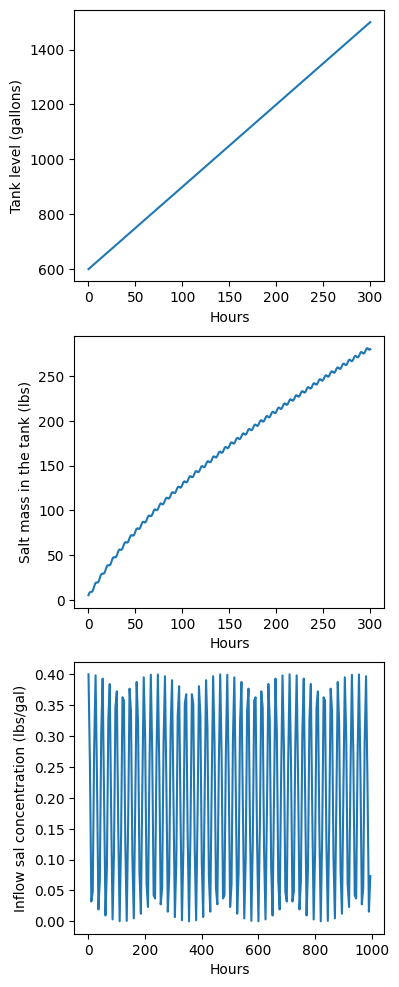

In [17]:
# Create figures
plt.figure(figsize=(4,12))

plt.subplot(3,1,1)
plt.plot(range(period),tank_level)
plt.xlabel('Hours')
plt.ylabel('Tank level (gallons)')

plt.subplot(3,1,2)
plt.plot(range(period),salt_mass)
plt.xlabel('Hours')
plt.ylabel('Salt mass in the tank (lbs)')

plt.subplot(3,1,3)
# Plot every 5 values to clearly see the curve in the figure
plt.plot(range(0,period,5), 1/5*(1+np.cos(range(0, period,5))))
plt.xlabel('Hours')
plt.ylabel('Inflow sal concentration (lbs/gal)')
plt.show()

### Example 2: Excess of herbicide problem

A farmer is preparing to control weeds in a field crop using a sprayer with a tank containing 100 liters of fresh water. The recommended herbice concentration to control the weeds without affecting the crop is 2%, which means that the farmer would need to add 2 liters of herbice to the tank. However, due to an error while measuring the herbicide, the farmer adds 3 liters of herbicide instead of 2 liters, which will certainly kill the weeds, but may also damage the crop and contaminate the soil with unnecesary product. To fix the problem and avoid disposing the entire tank, the farmer decides to open the outflow valve to let some herbicide solution out of the tank at a rate of 3 liters per minute, while at the same time, adding fresh water from the top of the tank at a rate of 3 liters per minute. Assume that the tank has a stirrer that keeps the solution well-mixed (i.e. the herbicide concentration at any given time is homogenous across the tank). 

Indicate the time in minutes at which the herbicide concentration in the tank is restored at 2% (0.02 liters of herbicede per liter of fresh water). In other words, you need to find the time at which the farmer needs to close the outflow valve.


In [119]:
# Numerical Solution
tank_level = 100 # Liters
chemical_volume = 3 # Liters
chemical_concentration = chemical_volume/tank_level # Liter of chemical per Liter of water
inflow_rate = 3 # Liters per minute
outflow_rate = 3 # Liters per minute
recommended_concentration = 0.02 # Liter of chemical per Liter of water
dt = 0.1 # Time of each iteration in minutes
counter = 0 # Time tracker in minutes

while chemical_concentration > recommended_concentration:
    tank_level = tank_level + inflow_rate*dt - outflow_rate*dt
    chemical_inflow = 0
    chemical_outflow = chemical_volume/tank_level*outflow_rate*dt
    chemical_volume = chemical_volume + chemical_inflow - chemical_outflow
    chemical_concentration = chemical_volume/tank_level
    counter += dt

print('Solution:',round(counter,1),'minutes')

Solution: 13.5 minutes


## References

The examples in this notebook were adapted from problems and exercises in Morris. Tenenbaum and Pollard, H., 1963. Ordinary differential equations: an elementary textbook for students of mathematics, engineering, and the sciences. Dover Publications.